In [72]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Update log
# 2021/01/09
#   Add code for importing data
#   Add code for cleaning date time

In [73]:
# Import data
## change your url accordingly
data_url = 'data/20201019/xcme-bbo-es-fut-20201019-r-00095_1.csv' 
data = pd.read_csv(data_url)

In [81]:
#data[data['Price'] == 346475]
data[4:20]

,Date,Time,Sequence,Expiry_YYMM,Volume,Price,PriceD,ASK/BID,I_QT,MQ,C/OT,EntryDate
4,20201019,161346,28,2012,0,346475,2,NaN,I,NaN,NaN,201018
5,20201019,162446,31,2012,4,346475,2,B,NaN,M,NaN,201018
6,20201019,162446,31,2012,6,346500,2,B,NaN,M,NaN,201018
7,20201019,162446,34,2012,6,346500,2,A,NaN,M,NaN,201018
8,20201019,162446,34,2012,6,346500,2,A,NaN,M,NaN,201018
9,20201019,162446,35,2012,6,346500,2,A,NaN,M,NaN,201018
10,20201019,162446,35,2012,10,346500,2,A,NaN,M,NaN,201018
11,20201019,162446,37,2012,0,346500,2,NaN,I,NaN,NaN,201018
12,20201019,162533,39,2012,11,346525,2,B,NaN,M,NaN,201018
13,20201019,162533,39,2012,10,346500,2,B,NaN,M,NaN,201018


In [78]:
## inspect unique values of each column
for col in data.columns:
    print(col + ": " + str( data[col].unique() ))

Date: [20201019]
Time: [140008 161346 162446 ...   3026   3027   3028]
Sequence: [    15     27     28 ... 400628 400629 400631]
Expiry_YYMM: [2012]
Volume: [  4   1   0   6  10  11  14  16   9  23   5  21  24  25  26  27  29  34
  38  42  32  46  33  59  47  63   2  60  67  80  69  84  70   3  86  83
  87  71  85  81  97 102 101  88 103  93 107  94 111 110 109 108 105  99
  96  95  92  90  89  74  91  82  79  78  77  76  75  73  72  64  66  68
 104  98 106 112 114 115 116 117 100 118 119 120 121 122 123 124 128 132
 135 136 138 139 141 143 145 153 113 127 125 131 134 157  17  18   7  15
   8  12  13  20  50  52  53  54  51  48  40  30  28  19  22  41  43  39
  31  45  35  44  49  37  57  55  36  56  61  62 428  58 214 213 215 211
 147 142 137 129 130 126  65 158 159 150 151 148 149 152 190 191 144 140
 133]
Price: [346475 346450 346500 346525 346550 346625 346575 346600 346650 346750
 346675 346700 346725 346775 346800 346825 346850 346875 346900 346925
 346950 346975 347000 347025 34

In [79]:
# process time stamp
data_sorted = data.sort_values(by='Time') # sorting not neccessary, but easier to visualize

In [71]:
data_sorted[:30]

,Date,Time,Sequence,Expiry_YYMM,Volume,Price,PriceD,ASK/BID,I_QT,MQ,C/OT,EntryDate
Index,,,,,,,,,,,,
2020-10-19 00:00:00,20201019,000000,377826,2012,20,348550,2,B,NaN,M,NaN,201019
2020-10-19 00:00:00,20201019,000000,377826,2012,27,348500,2,B,NaN,M,NaN,201019
2020-10-19 00:00:00,20201019,000000,377832,2012,22,348550,2,A,NaN,M,NaN,201019
2020-10-19 00:00:00,20201019,000000,377832,2012,27,348500,2,A,NaN,M,NaN,201019
2020-10-19 00:00:01,20201019,000001,377853,2012,1,348550,2,NaN,NaN,NaN,NaN,201019
2020-10-19 00:00:01,20201019,000001,377857,2012,25,348500,2,B,NaN,M,NaN,201019
2020-10-19 00:00:01,20201019,000001,377857,2012,22,348550,2,B,NaN,M,NaN,201019
2020-10-19 00:00:01,20201019,000001,377855,2012,24,348500,2,A,NaN,M,NaN,201019
2020-10-19 00:00:01,20201019,000001,377855,2012,22,348550,2,A,NaN,M,NaN,201019


In [31]:
data_sorted['Time'] = data_sorted['Time'].apply(lambda x: str(x).zfill(6))

In [41]:
data_sorted['Index'] = data_sorted['Date'].astype(str) + data_sorted['Time']

In [47]:
data_sorted['Index'] = pd.to_datetime(data_sorted['Index'], format='%Y%m%d%H%M%S')

In [49]:
data_sorted.set_index('Index', inplace=True)
data_sorted

,Date,Time,Sequence,Expiry_YYMM,Volume,Price,PriceD,ASK/BID,I_QT,MQ,C/OT,EntryDate
Index,,,,,,,,,,,,
2020-10-19 00:00:00,20201019,000000,377826,2012,20,348550,2,B,NaN,M,NaN,201019
2020-10-19 00:00:00,20201019,000000,377826,2012,27,348500,2,B,NaN,M,NaN,201019
2020-10-19 00:00:00,20201019,000000,377832,2012,22,348550,2,A,NaN,M,NaN,201019
2020-10-19 00:00:00,20201019,000000,377832,2012,27,348500,2,A,NaN,M,NaN,201019
2020-10-19 00:00:01,20201019,000001,377853,2012,1,348550,2,NaN,NaN,NaN,NaN,201019
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19 23:59:59,20201019,235959,377799,2012,14,348550,2,B,NaN,M,NaN,201018
2020-10-19 23:59:59,20201019,235959,377799,2012,4,348525,2,B,NaN,M,NaN,201018
2020-10-19 23:59:59,20201019,235959,377800,2012,14,348550,2,B,NaN,M,NaN,201018


In [50]:
transactions = data_sorted[data_sorted['ASK/BID'].isnull()] # faster function to find NAN?
asks = data_sorted[data_sorted['ASK/BID'] == 'A']
bids = data_sorted[data_sorted['ASK/BID'] == 'B']

In [65]:
transactions_main = transactions.between_time('00:00', '00:15')
transactions_main

,Date,Time,Sequence,Expiry_YYMM,Volume,Price,PriceD,ASK/BID,I_QT,MQ,C/OT,EntryDate
Index,,,,,,,,,,,,
2020-10-19 00:00:01,20201019,000001,377853,2012,1,348550,2,NaN,NaN,NaN,NaN,201019
2020-10-19 00:00:01,20201019,000001,377836,2012,2,348525,2,NaN,NaN,NaN,NaN,201019
2020-10-19 00:00:03,20201019,000003,377896,2012,1,348525,2,NaN,NaN,NaN,NaN,201019
2020-10-19 00:00:05,20201019,000005,377958,2012,1,348500,2,NaN,NaN,NaN,NaN,201019
2020-10-19 00:00:05,20201019,000005,377961,2012,4,348500,2,NaN,NaN,NaN,NaN,201019
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19 00:14:37,20201019,001437,390122,2012,1,348725,2,NaN,NaN,NaN,NaN,201019
2020-10-19 00:14:48,20201019,001448,390170,2012,5,348700,2,NaN,NaN,NaN,NaN,201019
2020-10-19 00:14:53,20201019,001453,390200,2012,1,348725,2,NaN,NaN,NaN,NaN,201019


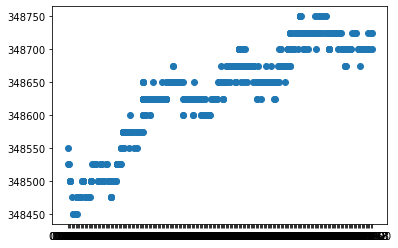

In [82]:
# visualize the price
plt.scatter(transactions_main['Time'], transactions_main['Price'])
plt.show()